<a href="https://colab.research.google.com/github/ashamar1511/Airline-Passenger-Referral-Prediction/blob/main/online%20retail%20customer%20segmentation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - **Online Retail Customer Segmentation** 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Amar Kumar Vishwakarma
##### **Team Member 2 -** - Resham Kumari


# **Project Summary -**

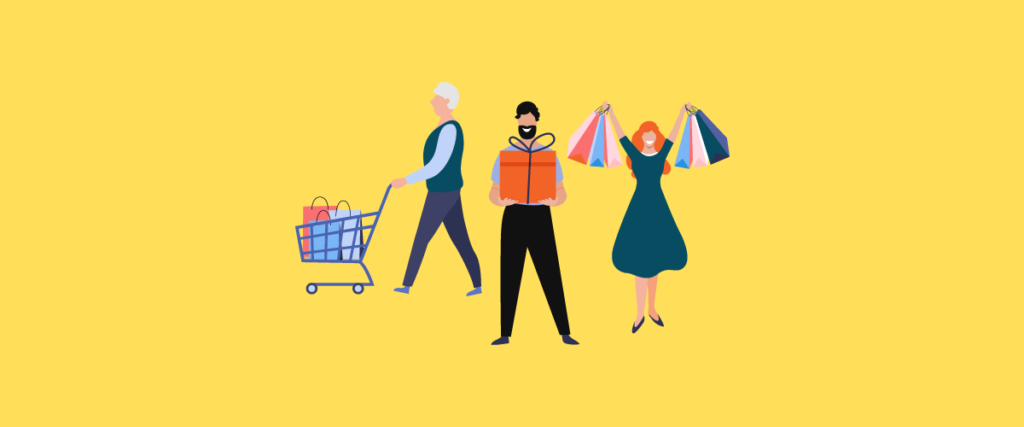

# **Introduction**

In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, transactions data in order to divide customers into groups.

Our goal in this Notebook is to cluster our customers to get insights in:

* Increasing revenue (Knowing customers who present most of our revenue)
* Increasing customer retention
* Discovering Trends and patterns
* Defining customers at risk

We will do RFM Analysis as a first step and then combine RFM with predictive algorithms (k-means).



# **GitHub Link -**

https://github.com/ashamar1511

# **Problem Statement**


RFM Analysis answers these questions:

* Who are our best customers?
* Who has the potential to be converted in more profitable customers?
* Which customers we must retain?
* Which group of customers is most likely to respond to our current campaign?


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Capstone Project unsupervised/Online Retail/Online Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
#checking top 5 rows of dataset
df.head()

In [ ]:
#checking bottom 5 rows of dataset
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

As we can see we have most of null values in customerID and all other columns looks fine. we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense.

In [ ]:
#columns of dataset
df.columns

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated())

# **Data Cleaning**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Here we have null values present in our dataset like in CustomerID and Description.we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense.

In [ ]:
# Visualizing the missing values
#dropping null values
df.dropna(inplace=True)


In [ ]:
#checking for missing values
df.isnull().sum()

In [ ]:
#Checking info
df.info()

In [ ]:
#checking shape
df.shape

### What did you know about your dataset?

After removing null value from our dataset.

Now we have 406829 rows and 8 columns in our dataset. 

## ***2. Understanding Your Variables***

In [ ]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# Dataset Columns
print(df.columns)

# **Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.**

In [ ]:
df.shape

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

In [ ]:
#bottom 5 description name
Description_df.tail()

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

##### 2. What is/are the insight(s) found from the chart?

# **Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

#### Chart - 2

**StockCode Name**

In [ ]:
# Chart - 2 visualization code
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

In [ ]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

In [ ]:
#bottom 5 stockcode name
StockCode_df.tail()

##### 1. What is/are the insight(s) found from the chart?

### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B 

4.84879

5.4756

#### Chart - 3

**Country Name**

In [ ]:
# Chart - 3 visualization code
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
#top 5 country name
country_df.head()

In [ ]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='spring_r');

In [ ]:
#bottom 5 country name
country_df.tail()

##### 1. Why did you pick the specific chart?

From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain

In [ ]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-5:], palette='spring_r');

##### 2. What is/are the insight(s) found from the chart?

From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

#### Chart - 4

**Distribution of Quantity**

In [ ]:
# Chart - 4 visualization code
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

##### 1. Why did you pick the specific chart?

Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

#### Chart - 6

**Distribution of Unit Price**

In [ ]:
# Chart - 6 visualization code
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

In [ ]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

##### 1. What is/are the insight(s) found from the chart?

From the distribution of unit price, we can say that most items have a lower price range.

#### Chart - 7

# **Feature engineering**

In [ ]:
# Chart - 7 visualization code
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [ ]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

**Distribution of total amount**

In [ ]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

#### Chart - 8

**Months**

In [ ]:
# Chart - 8 visualization code
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

##### 1. What is/are the insight(s) found from the chart?

Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.

Answer Here

#### Chart - 9

# **Days**

In [ ]:
# Chart - 9 visualization code
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

In [ ]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

##### 1. What is/are the insight(s) found from the chart?

We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.**

**Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday

#### Chart - 10

## **Hour**

In [ ]:
# Chart - 10 visualization code
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

##### 1. What is/are the insight(s) found from the chart?

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

In [ ]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

##### 1. What is/are the insight(s) found from the chart?

Most of the customers have purchased the items in Afternoon.
Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening

#### Chart - 12

# **Create the RFM model (Recency, Frequency,Monetary value)**

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Frequency – How often do they purchase?**

### **Monetary – How much do they spend?**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [ ]:
# Chart - 12 visualization code
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

##### 1. What is/are the insight(s) found from the chart?

From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.

#### Chart - 13

## **Splitting into four segments using quantiles.**

In [ ]:
# Chart - 13 visualization code
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

In [ ]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

##### 1. What is/are the insight(s) found from the chart?

As we can see from the above plots, skewness has been removed from the data.

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#### Chart - 14 - Correlation Heatmap

# **Clustering**

### **K-Means Clustering**

**Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

**KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [ ]:
# Correlation Heatmap visualization code
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### **Silhouette score method:**

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.**

## **Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

### **Elbow Method:**

**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

## **Applying Elbow Method on Recency and Monetary**

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

##### 1. What is/are the insight(s) found from the chart?

♦ ***Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.***

#### Chart - 15 - Pair Plot 

### **DBSCAN Clustering:**

**DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.**

## **Applying DBSCAN on Recency and Monetary**

In [ ]:
# Pair Plot visualization code
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

##### 1. What is/are the insight(s) found from the chart?

Here we can see that, Customers are separated when we cluster them by Recency and Monetary.

## **Applying silhouette Score Method on Frquency and Monetary**

In [ ]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

## **Applying Elbow Method on Frequency and Monetary**

In [ ]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.***

## **Applying DBSCAN to Method on Frquency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

## **Applying Silhouette Method on Recency, Frequency and Monetary**

In [ ]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

In [ ]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

 ***Here we can see that, Customers are  separated when we cluster them by Recency, Frequency and Monetary.***

## **Applying Elbow Method on Recency, Frequency and Monetary**

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

## **Applying DBSCAN to Recency, Frequency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

***Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.***

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

In [ ]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

## **Hierarchical clustering**

**Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.**

### **Dendogram**

**A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.**

## **Dendogram to find the optimal number of clusters**

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 



### **Here, we can see No. of Clusters = 2**

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

**We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
1. Three Clusters (Customer Segments):
Carefully examining the three cluster classification, we observe following groups of customers:

High value customer:
'Cluster 2' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.
2. Medium value customer:
'Cluster 0' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.
3. Low value customer:
It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones.

2. Five Clusters (Customer Segments):
In five clusters, we find the following customer segments:

Overall high valued customers:
'Cluster 0' is the typical high value customer who has shopped recently and shops regularly for high value orders. 2. High monetary value but less frequent:
'Cluster 1' represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.
3. Medium value - low frequency - recent customers:
The customers from 'Cluster 4' have recently placed medium valued orders but do not do so frequently.
4. Medium value - low frequency - older customers:
The customers from 'Cluster 3' happen to place medium valued orders quite a long time ago and they do not do so frequently.
5. Low valued customers:
'Cluster 2' is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.
The visualization of clusters in Silhoutte Analysis show some overlapp between the customer segments.
However, the dataset does not distinguish between wholesale and retail customers, it is quite likely that high value frequent clients are the wholesale dealers and medium/ low valued ones are individual retail purchasers.

# **Conclusion**





*   ***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.*** 




*   ***Using  a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters  and got a silhoutte score of 0.39 for two clusters***





*  ***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.*** 

*   ***The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.***